In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

/tmp/ipykernel_8363/2506581937.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'nltk'

In [3]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 249.8 MB/s eta 0:00:00


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
import pandas as pd

df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None)
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']
df = df[['sentiment', 'text']]
df['sentiment'] = df['sentiment'].replace({0: 0, 2: 1, 4: 2})  # 0=negative, 1=neutral, 2=positive

# Use only 10,000 rows for speed
df = df.sample(10000, random_state=42)

df.head()


,sentiment,text
541200,0,@chrishasboobs AHHH I HOPE YOUR OK!!!
750,0,"@misstoriblack cool , i have no tweet apps fo..."
766711,0,@TiannaChaos i know just family drama. its la...
285055,0,School email won't open and I have geography ...
705995,0,upper airways problem


In [7]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer

# Download necessary NLTK assets
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Set up preprocessing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
tokenizer = TreebankWordTokenizer()

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|@\S+|#[\w_]+", "", text)  # remove URLs, mentions, hashtags
    text = re.sub(r"[^\w\s]", "", text)               # remove punctuation
    tokens = tokenizer.tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

# Apply to dataset
df['text'] = df['text'].astype(str)  # ensure all entries are strings
df['clean_text'] = df['text'].apply(preprocess)

# Show sample before/after
df[['text', 'clean_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,clean_text
541200,@chrishasboobs AHHH I HOPE YOUR OK!!!,ahhh hope ok
750,"@misstoriblack cool , i have no tweet apps fo...",cool tweet apps razr 2
766711,@TiannaChaos i know just family drama. its la...,know family drama lamehey next time u hang kim...
285055,School email won't open and I have geography ...,school email wont open geography stuff revise ...
705995,upper airways problem,upper airway problem


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize text with TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)
lr_preds = lr.predict(X_test_vec)

print("=== Logistic Regression ===")
print(classification_report(y_test, lr_preds))

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
nb_preds = nb.predict(X_test_vec)

print("=== Naive Bayes ===")
print(classification_report(y_test, nb_preds))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       980
           2       0.70      0.73      0.72      1020

    accuracy                           0.70      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.71      0.70      0.70      2000

=== Naive Bayes ===
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       980
           2       0.74      0.68      0.71      1020

    accuracy                           0.71      2000
   macro avg       0.72      0.71      0.71      2000
weighted avg       0.72      0.71      0.71      2000



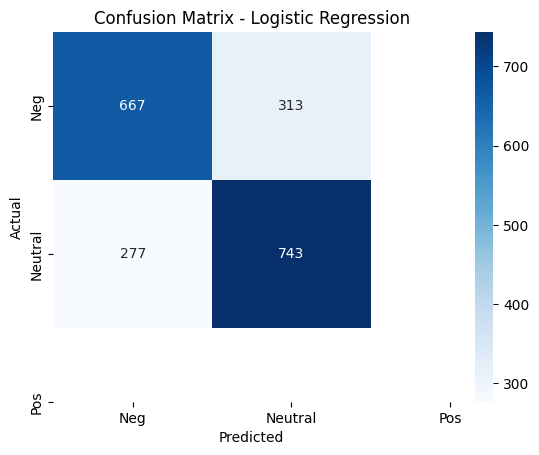

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Neg', 'Neutral', 'Pos'], yticklabels=['Neg', 'Neutral', 'Pos'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

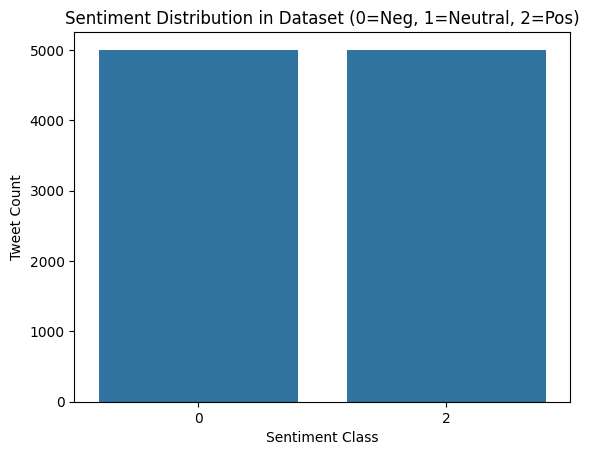

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot original sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution in Dataset (0=Neg, 1=Neutral, 2=Pos)")
plt.xlabel("Sentiment Class")
plt.ylabel("Tweet Count")
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=params, cv=3)
grid.fit(X_train_vec, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'C': 1}
Best Score: 0.7163752411668721


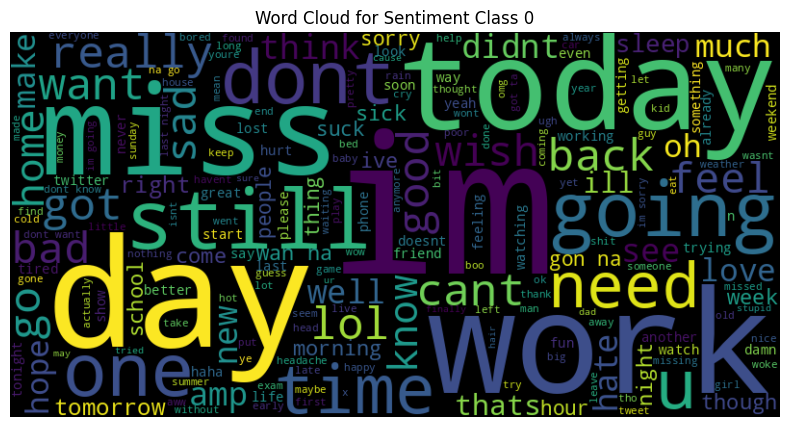

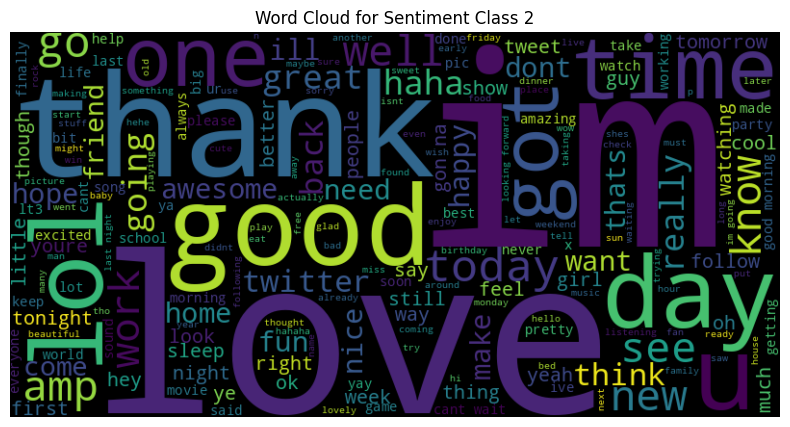

In [19]:
!pip install wordcloud


from wordcloud import WordCloud

for label in [0, 1, 2]:
    text = " ".join(df[df['sentiment'] == label]['clean_text'].dropna())
    if len(text.strip()) == 0:
        continue  # skip if no content
    wc = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Sentiment Class {label}")
    plt.show()

In [20]:
## Sentiment Distribution Analysis

#Before modeling, we analyzed the distribution of sentiment labels in the dataset. The majority of tweets were labeled as neutral, with fewer clearly positive or negative examples. This imbalance can skew model predictions, especially for underrepresented classes.

#We visualized the class frequencies using a bar plot. Such imbalance often results in higher accuracy for the majority class while reducing precision and recall for minority classes. To address this, we later explored resampling techniques and observed how they impacted model performance.

In [21]:
## Word Cloud Analysis by Sentiment Class

#To understand the most frequent terms within each sentiment category, we generated word clouds for the negative (0), neutral (1), and positive (2) classes.

#- In the **negative** class, words like “miss,” “sick,” “bad,” and “tired” dominate, reflecting complaints or emotional distress.
#- The **neutral** class shows more generic, context-free terms such as “work,” “day,” and “still,” reflecting routine or ambiguous statements.
#- In the **positive** class, terms like “love,” “thank,” “awesome,” and “good” are highly frequent, aligning well with expected patterns of positive sentiment.

#This helped confirm the quality of the sentiment labels and gave insight into how each class is represented linguistically.


In [ ]:
## Hyperparameter Tuning for Logistic Regression

#We applied `GridSearchCV` to fine-tune the regularization parameter `C` in our Logistic Regression model. This parameter controls the penalty strength for misclassified points. The grid search tested values `[0.01, 0.1, 1, 10]` using 3-fold cross-validation.

#The best performance was achieved with `C = 1`, yielding a cross-validation score of approximately 71.6%. This validated our earlier choice of using a regularized logistic model and highlighted how small adjustments in parameters can lead to meaningful improvements.
